# Прогнозирование вероятности оттока пользователей для фитнес-центра

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Анализ-датасета" data-toc-modified-id="Анализ-датасета-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ датасета</a></span></li><li><span><a href="#Анализ-средних-значений-по-оттоку" data-toc-modified-id="Анализ-средних-значений-по-оттоку-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ средних значений по оттоку</a></span></li><li><span><a href="#Анализ-гистограмм-и-распределения-признаков" data-toc-modified-id="Анализ-гистограмм-и-распределения-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ гистограмм и распределения признаков</a></span></li><li><span><a href="#Анализ-матрицы-корреляции" data-toc-modified-id="Анализ-матрицы-корреляции-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ матрицы корреляции</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Метрики" data-toc-modified-id="Метрики-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метрики</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

**Вводные данные**   
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  

Проблема - отток клиентов.   

Отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет, которые содержат данные за месяц до оттока и факт оттока на определённый месяц.

**Цель** — научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента и подготовить план действий по удержанию клиентов.  

**На основе данных о посетителях сети фитнес-центров спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей**

**Задачи**:  
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:   
1) выделить целевые группы клиентов;   
2) предложить меры по снижению оттока;   
3) определить другие особенности взаимодействия с клиентами.   

## Обзор данных

In [1]:
# загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import combinations
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# прочитаем из csv-файла данные
data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# составим инфориацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Согласно технической документации:  

**Данные клиента за предыдущий до проверки факта оттока месяц:**
  * `gender` — пол;
  * `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
  * `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
  * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
  * `Phone` — наличие контактного телефона;
  * `Age` — возраст;
  * `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**
  * `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
  * `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
  * `Group_visits` — факт посещения групповых занятий;
  * `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
  * `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
  * `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
  * `Churn` — факт оттока в текущем месяце.

### Предобработка данных

In [4]:
# приведем названия к нижнему регистру и распечатаем первые 3 строки
data.columns = map(str.lower, data.columns)
data.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


### Вывод

В таблице 4000 записей и 14 колонок. Данных достаточно для обучения.    
Пропусков нет, все данные имеют числовой тип. Это означает, что категориальные переменные переведены в количественные и дополнительной обработки не потребуется.   
Названия столбцов были приведены к хорошему стилю.

## Исследовательский анализ данных (EDA)

### Анализ датасета
* Посмотрите на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());

In [5]:
# Изучим подробнее датасет методом describe():
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Стандартное отклонение в пределах единицы говорит о том, что в данных отсутствуют аномальные значения, которые исказаят результат. 

Рассмотрим подробнее знвчения, для которых **std** прилично превышает 1:   

* Для `contract_period` знчания могут быть 1, 6 или 12. Стандартное отклонение = 4.55. При этом медиана все же = 1. Т.е. посетители фитнес-центра предпочитают не загадывать далеко и чаще покупают абонемент на месяц вперёд.   
* Для `age` значения могут варьироваться, но всё же **std** = 3,26. Возраст посетителей от 18 до 41, средний возраст 29.18 и медиана 29. Выглядит так, что посетители в возрасте от 18-26 и 32-41 компернсируют друг друга так, что медиана среднее арифметическое почти равны.
* Для `avg_additional_charges_total` **std** = 96.36. Минимум = 0.15, максимум = 552.59. Тут явно есть аномальные значения.
* Для `month_to_end_contract` цифры очень похожи с `contract_period`. Надо посмотреть корреляцию.
* Для `lifetime` **std** = 3.75, медиана = 3, среднее арифметическое = 3,72. Здесь есть аномальные значения.   

У остальных параметров **std** меньше или около единицы.   
Отсутствующих значений нет (count=4000 во всех столбцах).

### Анализ средних значений по оттоку
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

Сгруппируем датасет по оттоку `churn` и посмотрим на средние:

In [6]:
data.groupby('churn').mean().reset_index()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [7]:
data.groupby('churn').median().reset_index()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,1,1,1,0,1,6,0,30,149.881171,6.0,4,2.043252,2.046697
1,1,1,1,0,0,1,1,0,27,103.814686,1.0,1,1.491187,0.979445


Такие переменые как `gender, near_location, partner, promo_friends, phone, group_visits` являются категориальными (принимают значения 1 или 0), поэтому не имеет смысл анализировать средние.   
При рассмотрении ср.арифметического и мадианы получаем примерно одинаковые выводы.   

Для клиентов с признаком оттока **0** наблюдаем:
* Более длительный абонемент (ближе к 6 мес). 
* Более старший возраст (ближе к 30 лет).
* Больше тратят на доп услуги.
* Оставшееся время текущего абонемента чаще 6 месяцев.
* Более длительный стаж посещения фитнес-центра (чаще около 4 мес).
* Чаще посещают фитнес-центр: 2 и более раз в неделю.

### Анализ гистограмм и распределения признаков
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

Изучим столбчатые гистограммы и распределения признаков для **0** (остался) и **1** (ушел). Для этого подойдет ***distplot***

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


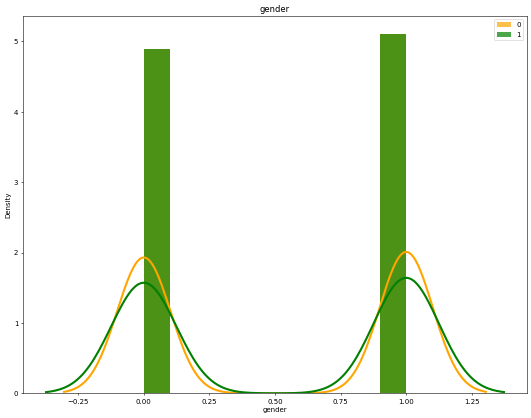

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


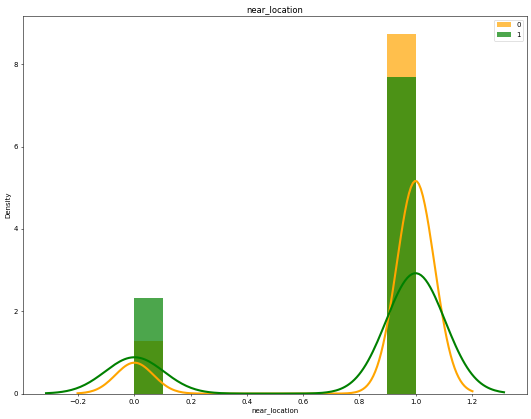

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


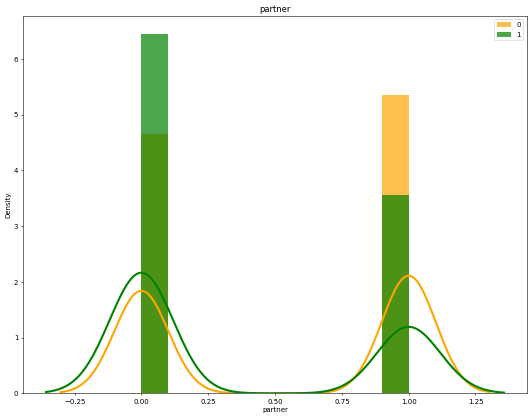

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


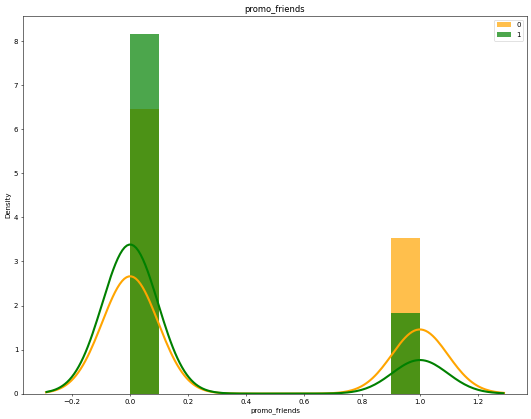

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


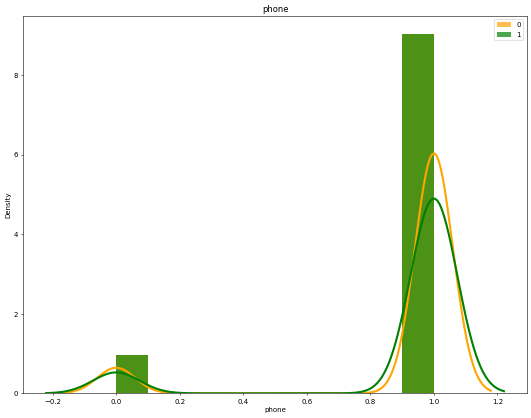

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


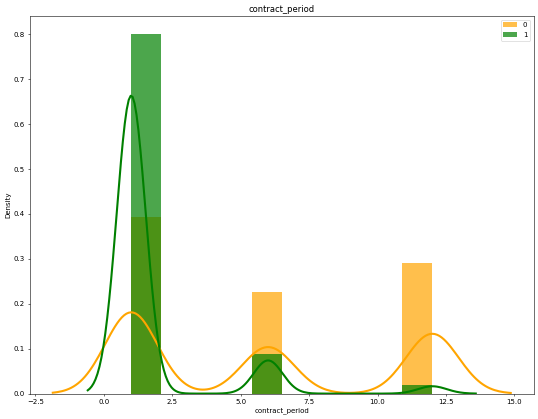

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


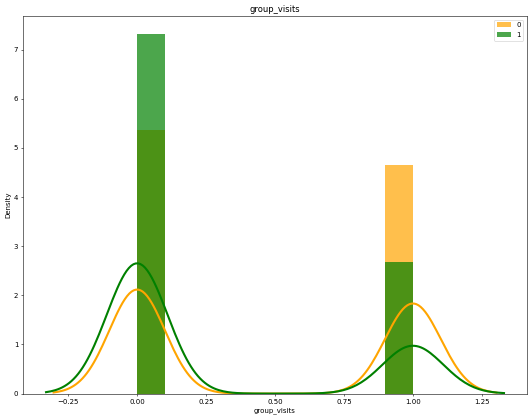

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


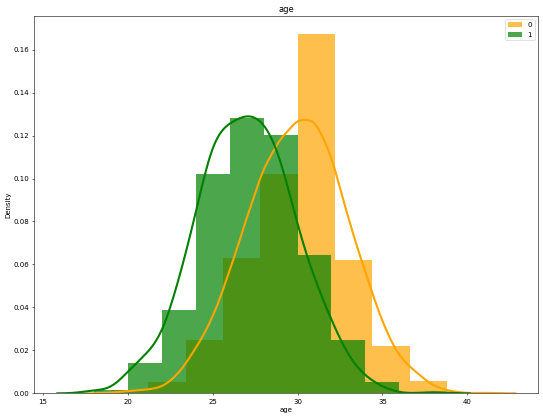

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


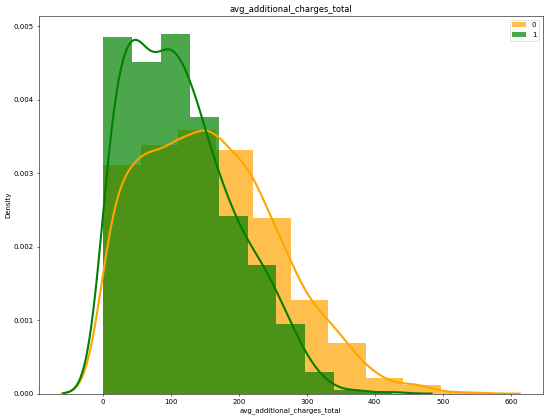

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


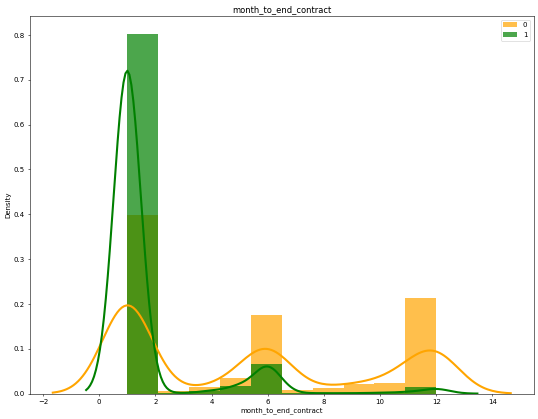

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


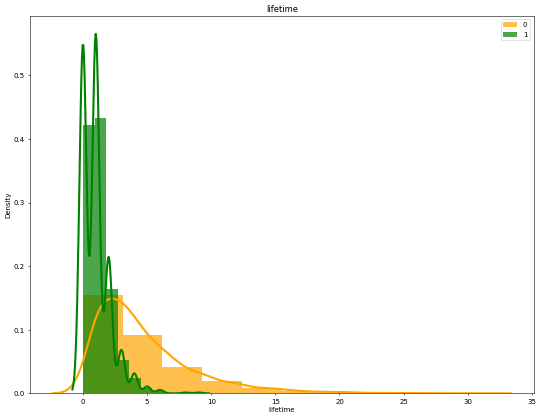

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


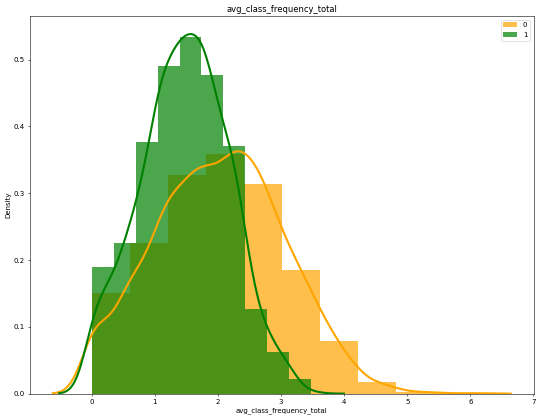

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


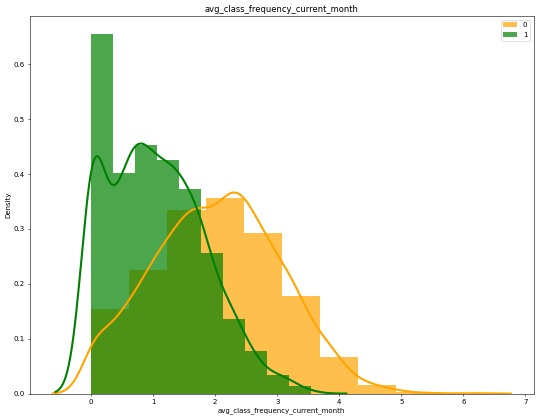

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate

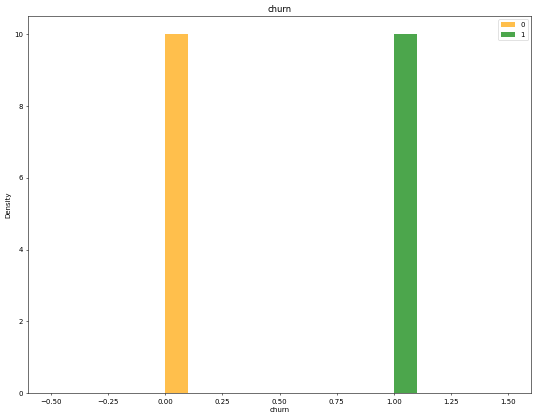

In [8]:
# Примечание: начиная с Seaborn 0.11, distplot() стал displot().
# Если вы используете более старую версию, вам также придется использовать более старую функцию.

df = data
for feature in df.columns:
    plt.figure(figsize=(13,10), dpi= 50)
# для построения гистограмм используем distplot(), т.к. displot() тут не работает
    sns.distplot(df.loc[df['churn'] == 0, feature], label=0, color="orange", bins=10,
                hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(df.loc[df['churn'] == 1, feature], label=1, color="g", bins=10,
                hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.title(feature)
    plt.legend()
    plt.show()

На гистограммах видны скошенности (из-за аномалии) для следующих значений переменных: `avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_total, avg_class_frequency_current_month`

### Анализ матрицы корреляции 
* Построим матрицу корреляций и отобразм её.

In [9]:
# корреляционная матрица
corr_m = data.corr()
# выведем матрицу
# corr_m

В таблице сложно ориентироваться, поэтому построим heatmap:

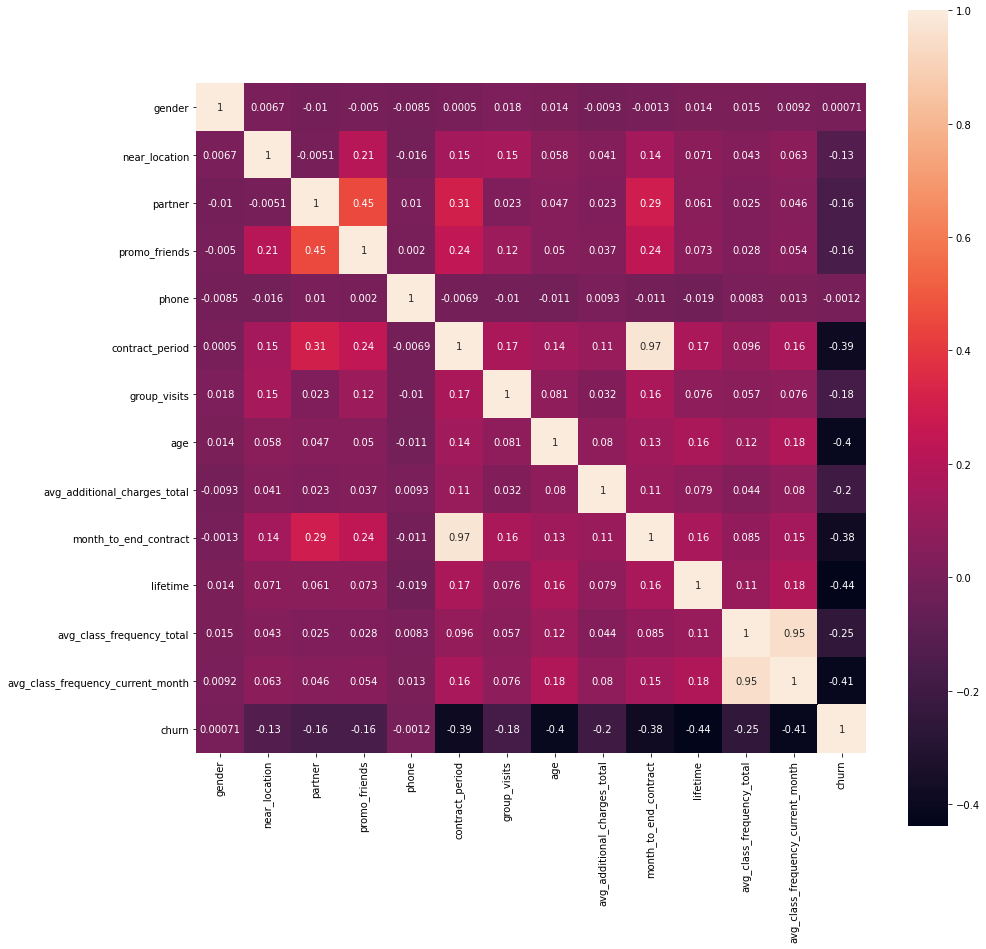

In [10]:
# нарисуем heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square=True, annot=True)
plt.show()

Рассмотрим корреляцию `churn` с остальными признаками:   

* положительная корреляция с признаком `gender`, но она очень незначительна = 0.00071.
* с остальными признаками наблюдается отрицательная корреляция, при этом самая высокая с признаком `phone` = -0.0012 , а самая низкая с признаком `lifetime` = -0.44.

Рассмотрим корреляцию признаков между собой:   

Высокая корреляция у признаков
* `contract_period` и `month_to_end_contract`
* `avg_class_frequency_total` и `avg_class_frequency_current_month`   

Для линейных моделей взаимная корреляция нежелательна, поэтому удалим `month_to_end_contract` и `avg_class_frequency_total`

In [11]:
# удаляем столбцы методом drop
data = data.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   lifetime                           4000 non-null   int64  
 10  avg_class_frequency_current_month  4000 non-null   float64
 11  churn                              4000 non-null   int64

### Вывод 

* Исходя из корреляций наиболее полезны признаки `avg_class_frequency_current_month, lifetime, age и contract_period`.
* Не смотря на наличие аномалий, нельзя утверждать, что данные слишком шумные и изменчивые. 
* Данные вполне пригодны для **ML**.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:   

* Разобьём данные на обучающую и валидационную выборку функцией train_test_split().
* Обучим модель на train-выборке двумя способами:
  * логистической регрессией,
  * случайным лесом.
* Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнитм по ним модели. Какая модель показала себя лучше на основании метрик?   

### Обучение

In [12]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
y = data['churn']
X = data.drop(['churn'], axis=1)

In [13]:
# разделим модель на обучающую и валидационную выборку в соотношении 80% к 20%
# укажем параметр random_state при разделении выборки и задании алгоритма

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Целевая переменная здесь — бинарная величина.    
Популярный алгоритм для решения таких задач — логистическая регрессия.**

In [14]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [16]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear', random_state=0)
# обучим модель логистической регрессии
lr_model.fit(X_train_st, y_train)

# получим прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]


In [17]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# получим прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1] 

### Метрики

In [18]:
# определим функцию, которая будет выводить наши метрики (accuracy, precision и recall)
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [19]:
# выведем все метрики для модели логистической регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82


In [20]:
# выведем все метрики для модели случайного леса
print_all_metrics(
    y_test, 
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75


### Вывод

Показатели `Accuracy` (доля правильных ответов) равны 0.90, а `Precision` (доля правильных ответов только среди целевого класса) для логистической регрессии и случайного леса сопоставимы и равны 0.79 и 0.81 соответственно, а вот `Recall`(сколько реальных объектов **"1-го"** класса мы смогли обнаружить) выше показала логистическая регрессия: 0.79 против 0.75. 

## Кластеризация клиентов

Исключим столбец с оттоком и проведём кластеризацию объектов (клиентов) и решим задачи:
* Стандартизируйте данные.
* Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [21]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(data.drop(['churn'], axis=1))
# строим матрицу расстояний
linked = linkage(x_sc, method = 'ward')

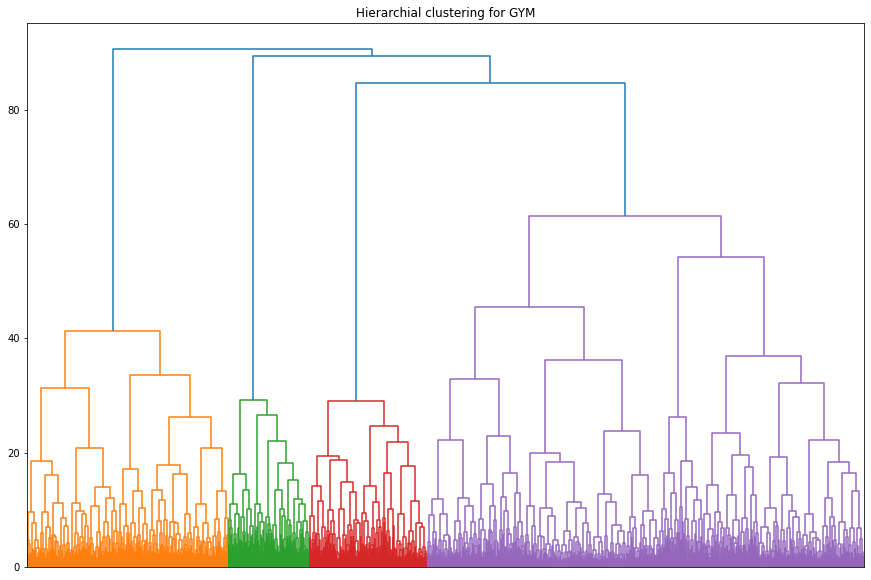

In [22]:
# рисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchial clustering for GYM')
plt.show()

Предложенное оптимальное число кластеров 5 (заданное условие в рамках учебного проекта).

In [23]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

In [24]:
# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

In [25]:
# выводим статистику по средним значениям наших признаков по кластеру
data.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


Здесь можно выделить явные группы, например в 0 кластере в основном сосредоточены клиенты, пришедшие по партнерской программе и с самой высокой длительностью текущего контракта. А в 1 кластере нет клиентов, проживающих рядом с фитнес-клубом.

Построим распределения признаков для кластеров.

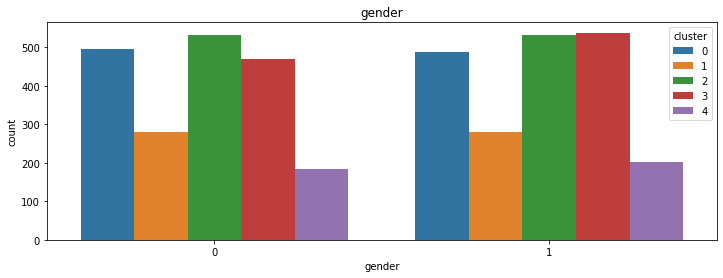

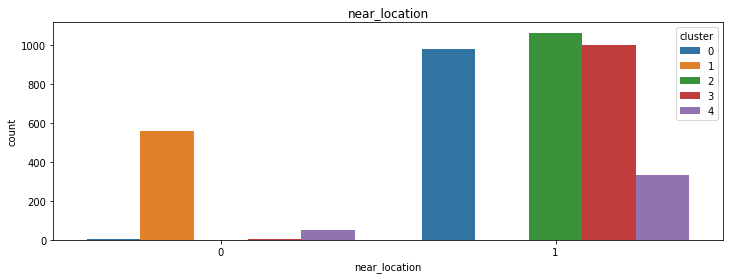

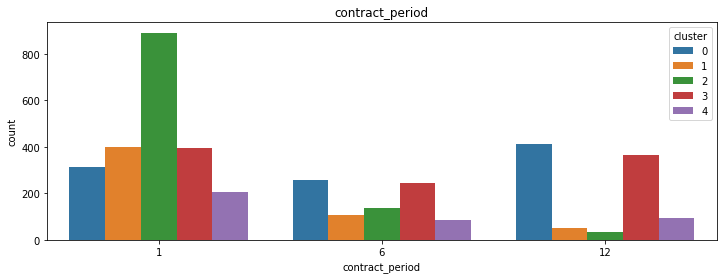

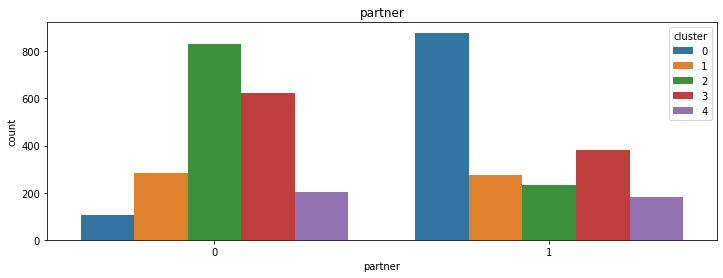

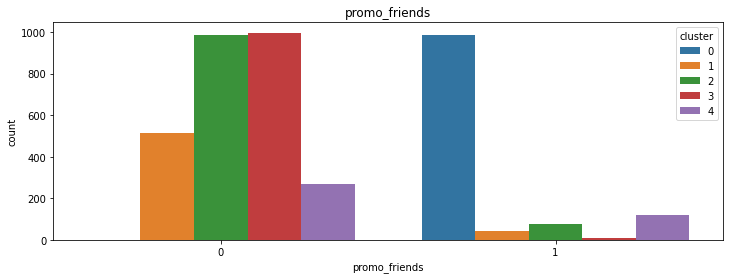

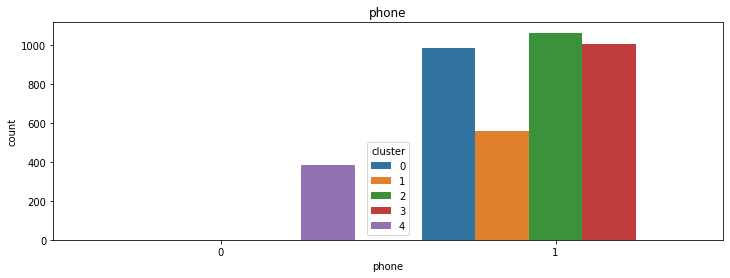

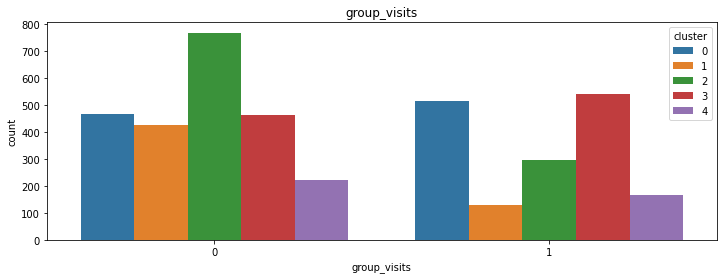

In [32]:
categorical_columns = ['gender', 'near_location', 'contract_period',
                       'partner', 'promo_friends', 'phone', 'group_visits']
for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=data[column], hue="cluster", data=data)
    plt.title(column)
    plt.show()

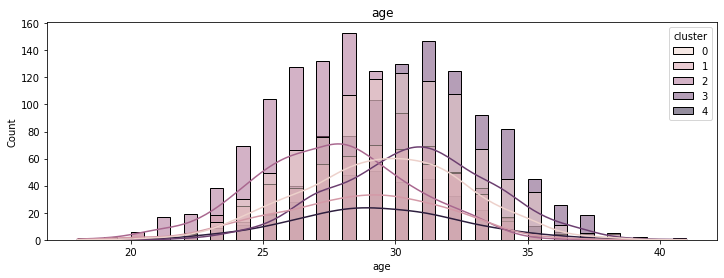

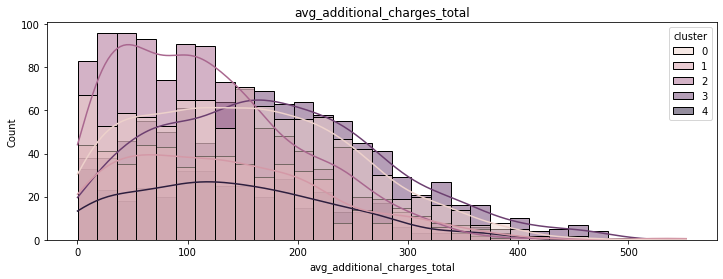

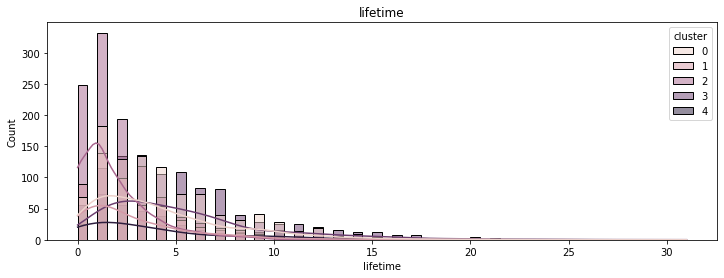

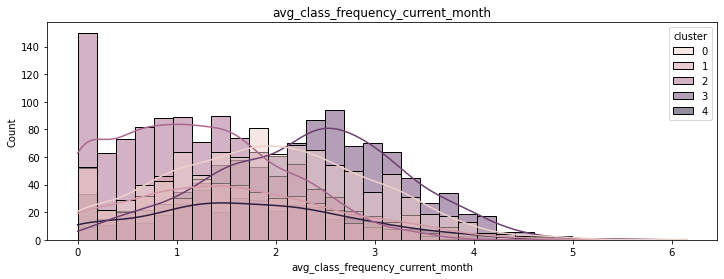

In [34]:
numerical_columns = ['age', 'avg_additional_charges_total',
                      'lifetime', 'avg_class_frequency_current_month']

for column in numerical_columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(x=data[column], hue="cluster", kde=True, data=data)
    plt.title(column)
    plt.show()

При рассмотрении распределения категориальных признаков по кластерам никаких особых закономерностей  не прослеживается.

При рассмотрении распределения численных признаков по кластерам видим:
* `age` клиентов распределены нормально
* `avg_additional_charges_total` и `lifetime` скошены вправо
* `avg_class_frequency_current_month` для кластеров 0 и 4 распределены почти нормально, а для кластеров 1, 2, 3 скошены влево.

Для каждого полученного кластера посчитаем долю оттока (методом groupby()).

In [39]:
(
    data.groupby('cluster', as_index=False)
    .agg({'churn':'mean'}).sort_values(by='churn', ascending=False)
)

,cluster,churn
2,2,0.563910
1,1,0.403226
4,4,0.266839
0,0,0.119797
3,3,0.014896


### Вывод

 Кластеры отличаются по доле оттока. Склонны к оттоку кластеры **2** (56%) и **1** (40%), кластер **4** - менее склонен к оттоку но все же почти треть (26%) уходит,  а кластеры **3** ( лишь 1,5%) и **0** (чуть менее 12%) - довольно надёжны.

## Выводы и базовые рекомендации по работе с клиентами

**Типичные портреты пользователей:**   
* 0 кластер:
  * клиенты, которые предпочитают посещать фитнес-центр, расположенный близко к работе - 0.99
  * преимущественно пришли от партнеров - 89%
  * отсутствуют пришедшие по промокоду - 100%
  * отсутствует номер телефона -100%
  * самый продолжительный средний период текущего контракта - 6.9 мес
  * чуть более половины предпочитают групповые занятия - 0.52
  * средний возраст - 29.6
  * высокий средний чек на доп услуги - 153.4 (второе место среди других кластеров)
  * лайфтайм ниже среднего контракта - 4.3 мес.
  * среднее количество посещений в неделю - 1.9
  * около 12% оттоку, т.е. почти каждый 10-й "отваливается".
* 1 кластер:
  * все представители кластера работают около фитнес центра.
  * почти половина (0.49) пришли от партнеров
  * отсутствует телефон - 100%
  * средняя продолжительность абонемента - 2.9
  * не так часто посещают групповые занятия - только 0.23
  * средний возраст - 28.7
  * средний чек на доп. услуги - 137.1
  * лайфтайм совпадает со средней продолжительностью абонемента - 2.9
  * среднее количество посещений в неделю - 1.5
  * 40% отток, т.е. 4 из 10 уходят
* 2 кластер:
  * никто не работает по близости
  * от партнеров только около 22%
  * промо-код использовали около 7%
  * отсутствуют номера телефонов - 100%
  * продолжительность контракта около 2 мес
  * только 27.6% посещают групповые занятия
  * средний возраст - 27.6 лет (наиболее молодой кластер)
  * самый низкий средний чек на доп услуги (119.3) из всех кластеров
  * лайфтайм совпадает с продолжительностью контракта - около 2 мес.
  * предпочтают посещать около 1 раза в наделю
  * каждый 5 или 6 уходит после 2-х месяцев
* 3 кластер:
  * клиенты, которые предпочитают посещать фитнес-центр, расположенный близко к работе - 0.99
  * пришли от партнеров - 38%
  * менее 1% использовали промо-код
  * отсутствуют номера телефонов - 100%
  * продолжительность абонемента около 6 мес.
  * 54% посещают групповые занятия
  * средний возраст около 30.7 лет (самый возрастной кластер)
  * самый высокий средний чек на доп.услуги - 176.3
  * лайфтайм чуть ниже среднего абонемента - 5.4 мес.
  * посещают занятия 2 и более раз в нелю (2.3)
  * самый низкий 1,5% отток
* 4 кластер:
  * клиенты, которые предпочитают посещать фитнес-центр, расположенный близко к работе - 86%
  * 47% пришли от партнеров
  * 31% использовали промо-код
  * 100% оставли свой номер телефона
  * 4.7 - средний период абонемента, т.е. здесь клиенты с абонементом на 3 или 6 месяцев
  * 43% посещают групповые занятия
  * 29 лет - средний возраст
  * 144.2 - средний чек на доп услуги (3-е место среди кластеров)
  * лайфтайм 3.9 мес
  * посещают фитнес 1-2 раза в неделю
  * около 26.6% отток

**Признаки, которые могут влиять на отток**   
Следует обратить внимание на следующие моменты:
1. Работа около ф.центра: если человек поменяет локализацию, то ф.центр не сможет повлиять на отток.
2. Скидки: если клиент не готов платить полную стоимость, то он найдет услуги подешевле (зона влияния ф.центра)
3. Продолжительность абонемента: клиенты, которые берут только месяц, возможно мало мотивированы (частитчно зона влияния ф.центра)
4. Доп.услуги/условия: по близости есть конкуренты с интересными для клиентов услугами, то ждите оттока (зона влияния ф.центра) 

**Рекомендации:**   

* Предлагаю проводить регулярное анкетирование клиентов, что бы отслеживать уровень лоялности, как он меняется в процессе. В зависимости от результатов анкетирования оперативно принимать меры по устранению причин потери интереса клиентов (если это в зоне влияния ф.центра).    
* Для клиентов, которым важны всякие скидки (4 кластер, например) разработать систему скидок, возможно индивидуальную.
* У всех клиентов брать номер телефона. Это позволит напомнить о себе или выяснить почему клиент перестал посещать ф.центр